In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CarPrice.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df=df.drop(columns=['car_ID', 'CarName'])

In [6]:
df.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
df.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Visualization

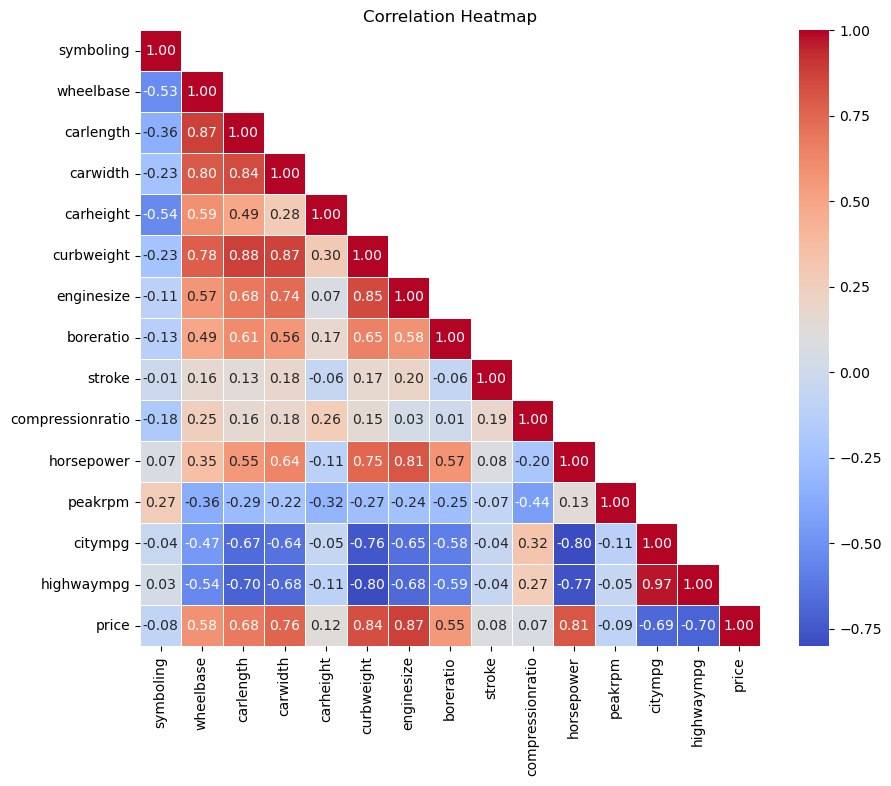

In [9]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=np.triu(correlation_matrix, k=1))
plt.title("Correlation Heatmap")
plt.show()

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric cols: ", numeric_cols)
print("Categorical cols: ", categorical_cols)

Numeric cols:  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Categorical cols:  ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


Feature Selection for numeric column

In [11]:
threshold = 0.6
numeric_cols = correlation_matrix.loc[(correlation_matrix['price'].abs() > threshold)].index.tolist()
numeric_cols.remove('price')
print(numeric_cols)

['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']


Visualization

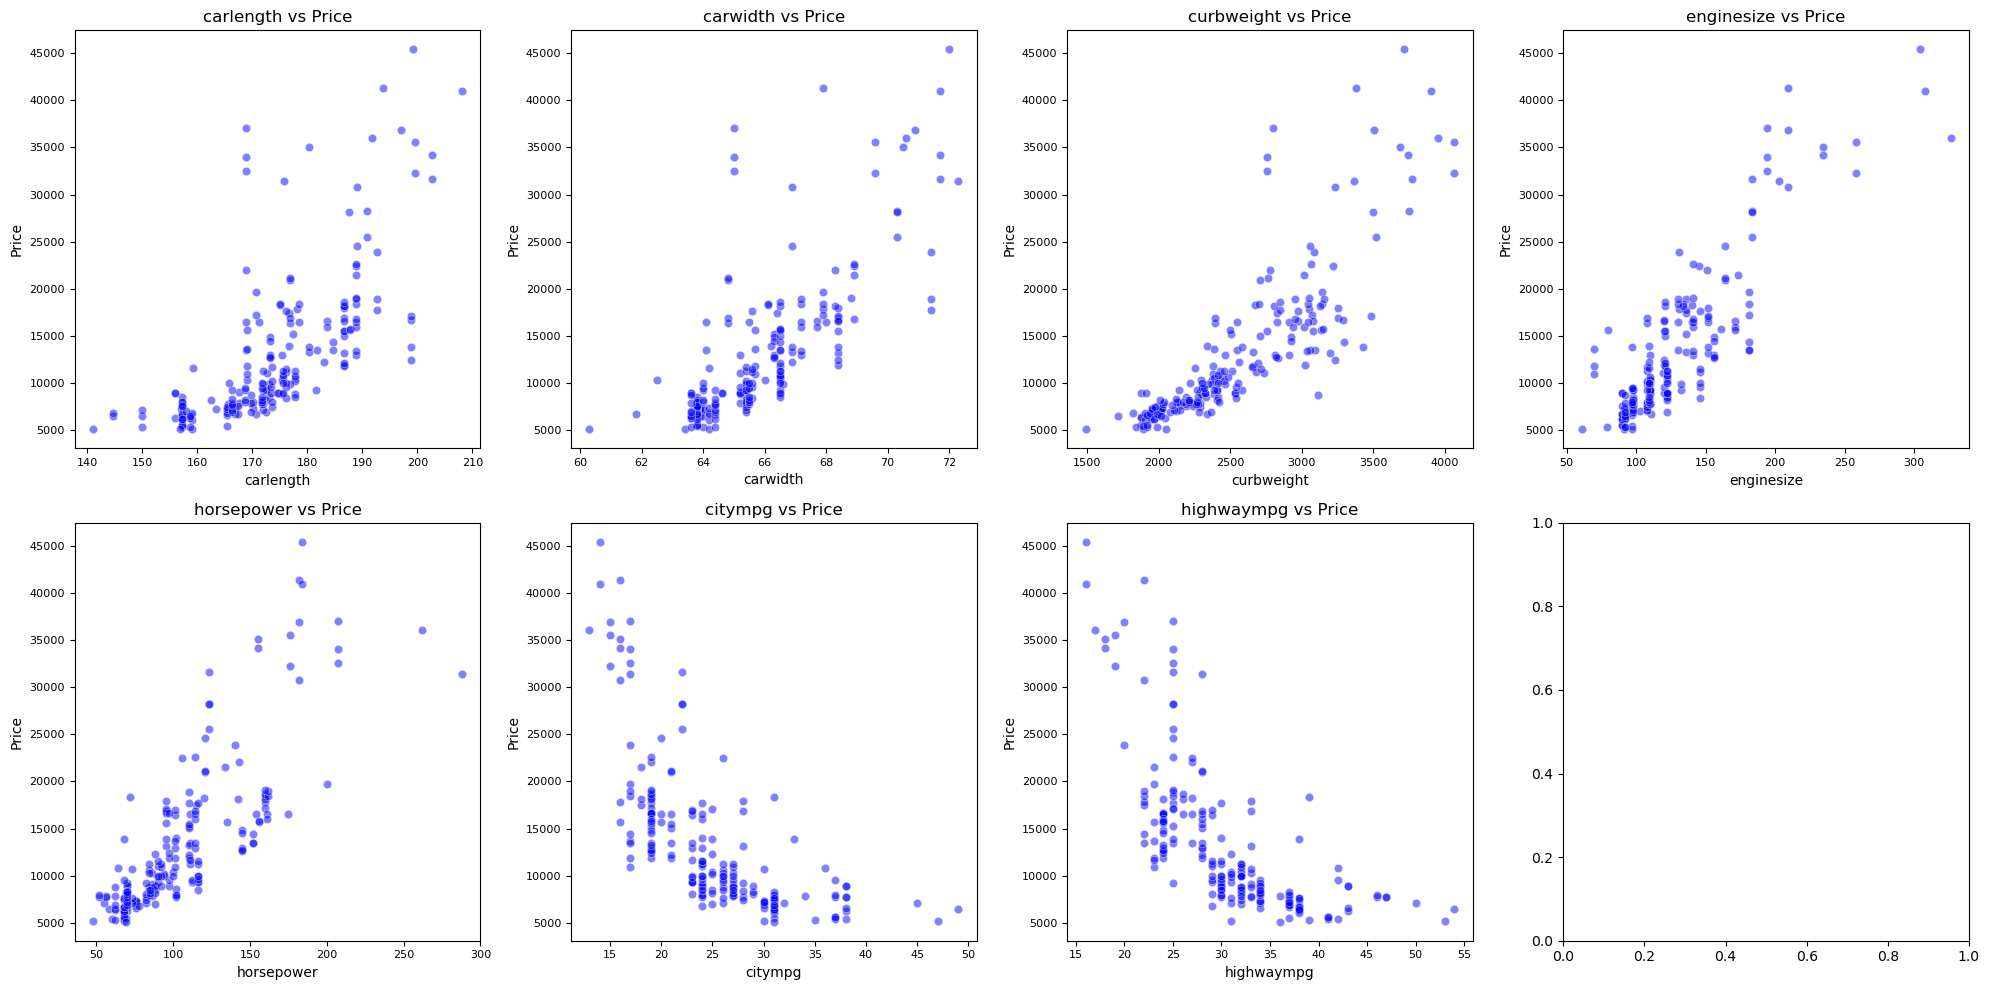

In [12]:
sns.set_palette("cool")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=df, x=col, y="price", ax=axes[i], alpha=0.5, color="blue")
    axes[i].set_title(f"{col} vs Price", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Price", fontsize=10)
    axes[i].tick_params(axis="both", labelsize=8)

plt.tight_layout()
plt.show()

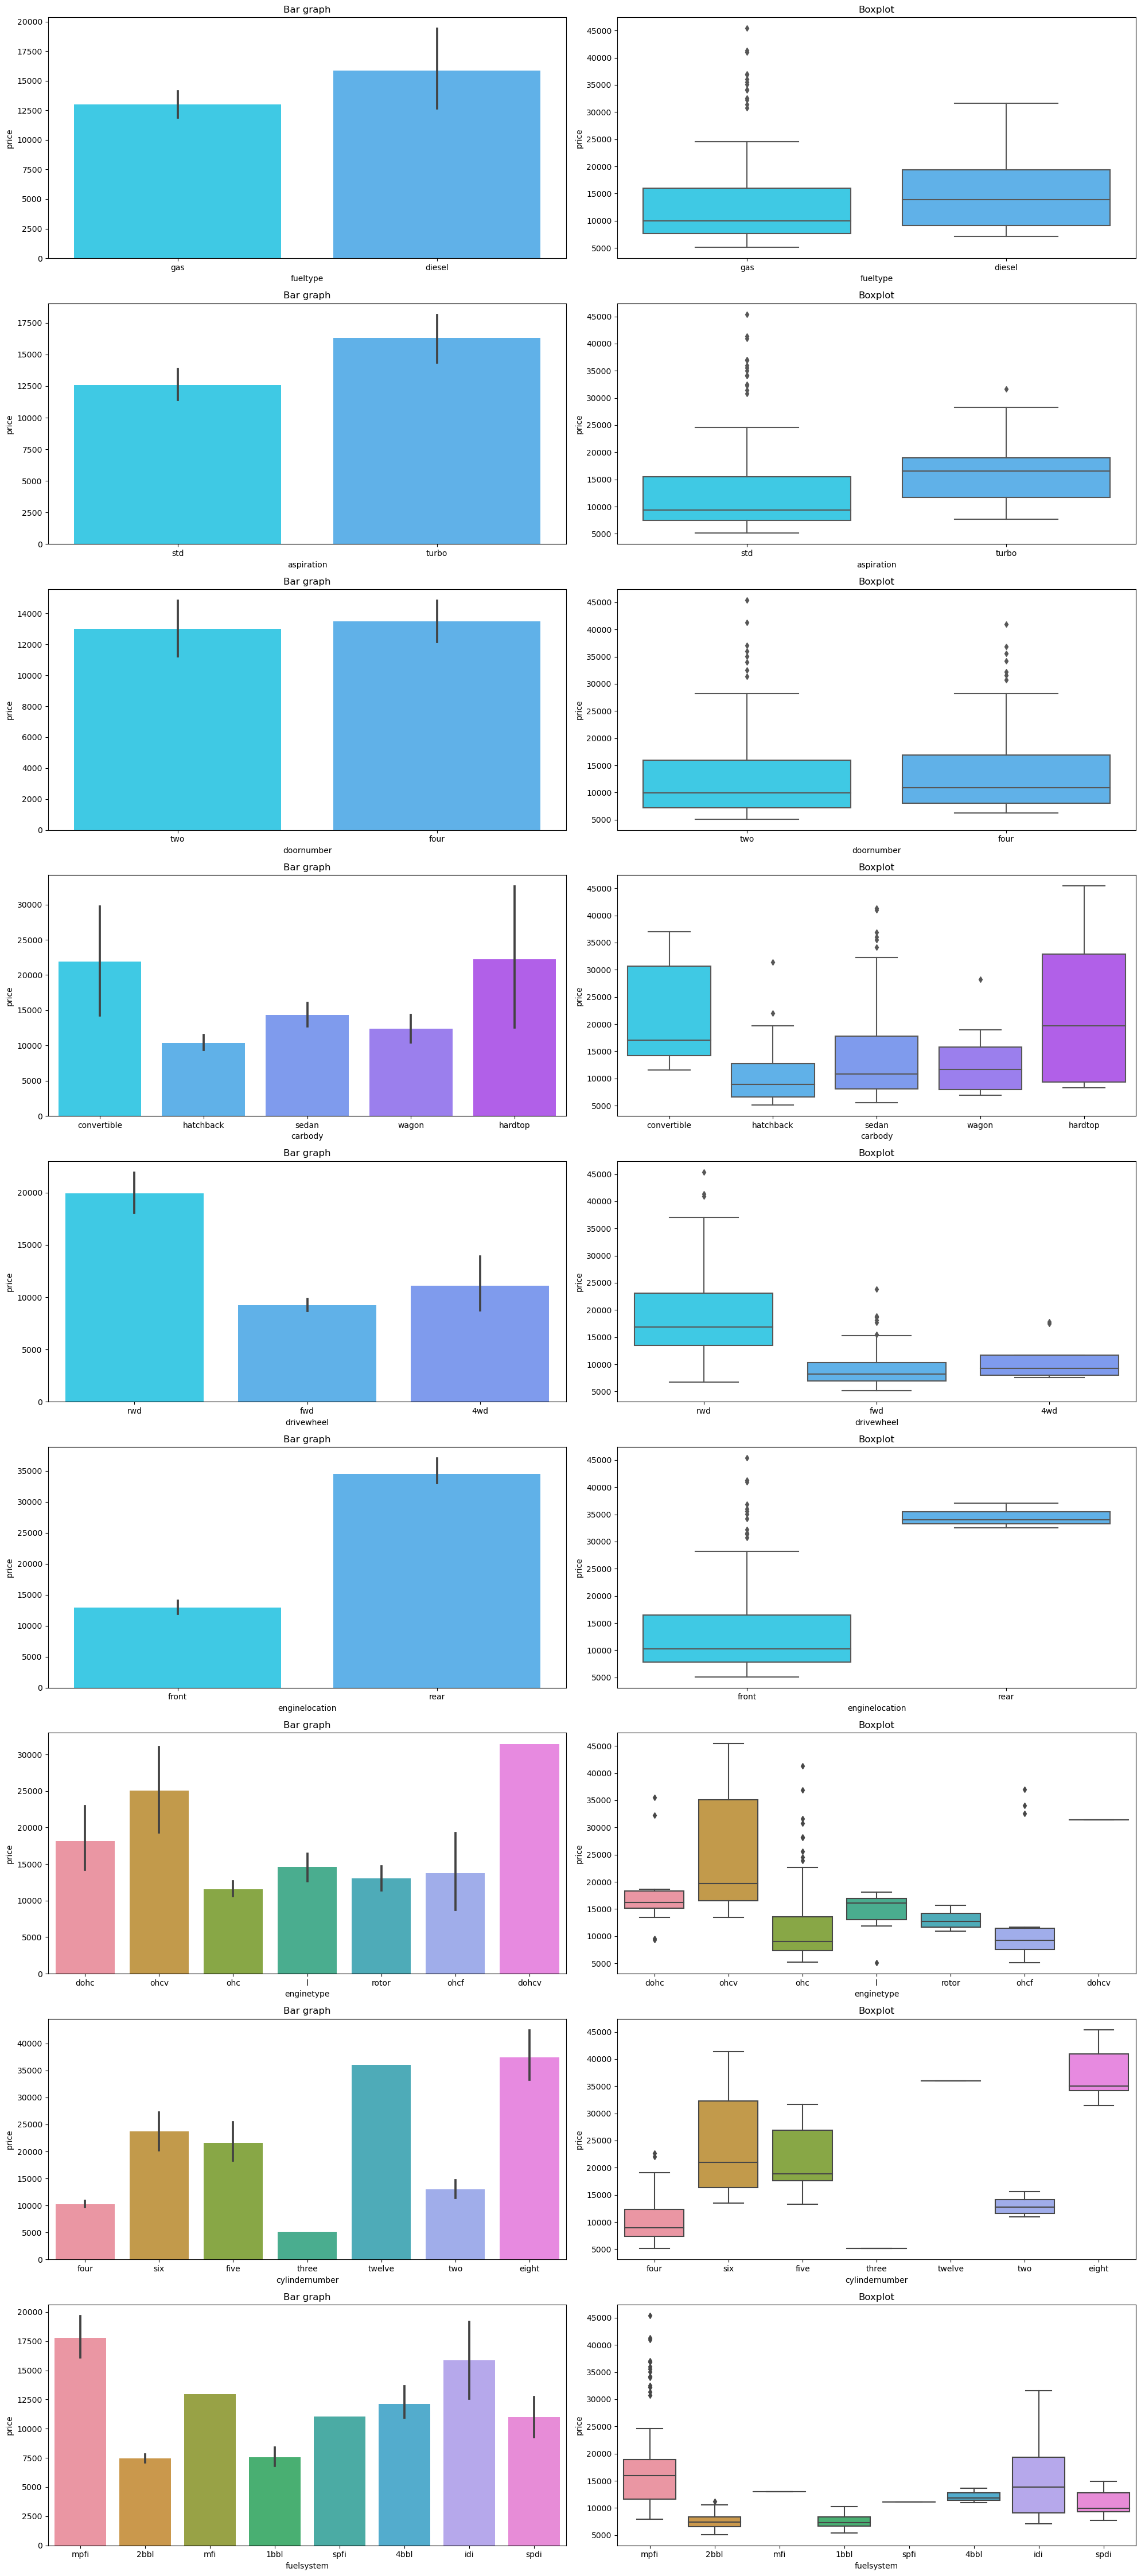

In [13]:
plt.figure(figsize=(20, 45))

for i, column in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 2, i*2+1)
    sns.barplot(data=df, x=column, y='price')
    plt.title('Bar graph')

    plt.subplot(len(categorical_cols), 2, i*2+2)
    sns.boxplot(data=df, x=column, y='price')
    plt.title('Boxplot')

plt.tight_layout()
plt.show()

One Hot Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [16]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [17]:
encoder.categories_

[array(['diesel', 'gas'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['four', 'two'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['4wd', 'fwd', 'rwd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object)]

In [18]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four', 'doornumber_two', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']


In [19]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [20]:
X=df[numeric_cols+encoded_cols]
X

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,2548,130,111,21,27,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,168.8,64.1,2548,130,111,21,27,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,171.2,65.5,2823,152,154,19,26,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,176.6,66.2,2337,109,102,24,30,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,176.6,66.4,2824,136,115,18,22,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,141,114,23,28,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,188.8,68.8,3049,141,160,19,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,188.8,68.9,3012,173,134,18,23,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,188.8,68.9,3217,145,106,26,27,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Normalization

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [25]:
y=df['price']

In [23]:
from sklearn.model_selection import GridSearchCV,train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

In [27]:
X_train.shape

(180, 45)

In [28]:
X_test.shape

(25, 45)

In [29]:
y_test.shape

(25,)

Selecting features for Categorical Columns

In [31]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

y_train = np.ravel(y_train)


lasso_cv = LassoCV(alphas=[80,160,200], cv=5) 
lasso_cv.fit(X_train, y_train)

optimal_alpha = lasso_cv.alpha_

lasso_model = Lasso(alpha=optimal_alpha)
lasso_model.fit(X_train, y_train)


nonzero_indices = np.nonzero(lasso_model.coef_)[0]


selected_features = X_train.columns[nonzero_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'citympg', 'carbody_convertible', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_four'],
      dtype='object')


Model

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [34]:
X=X[selected_features]

In [35]:
X_train=X_train[selected_features]
X_train.shape

(180, 17)

In [36]:
X_test=X_test[selected_features]
X_test.shape

(25, 17)

In [37]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9134539141642116

In [38]:

def run_grid_search(X, y, cv):
    scores = []
    y = y.ravel()
    models = {
        
        'XGBoost': {'model': XGBRegressor(), 'params': {'n_estimators': [ 100,200]}},
        'DecisionTree': {'model': DecisionTreeRegressor(), 'params': {'max_depth': [None, 5, 10]}},
        'Ridge': {'model': Ridge(), 'params': {'alpha': [0.1, 0.5, 1.0]}},
    }
    for model_name, config in models.items():
        for degree in [1, 2,3]:
            poly_features = PolynomialFeatures(degree=degree)
            X_poly = poly_features.fit_transform(X)
            model = config['model']
            params = config.get('params', {})
            gs = GridSearchCV(model, params, cv=cv, return_train_score=False)
            gs.fit(X_poly, y)
            scores.append({
                'model': f'{model_name} with PolynomialFeatures (Degree {degree})',
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
run_grid_search(X, y, cv)


c:\Users\Manas Pal\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=5.59389e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\Manas Pal\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=5.57381e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\Manas Pal\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=6.43253e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\Manas Pal\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=3.75839e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\Manas Pal\anaconda3\Lib\site-packages\s

,model,best_score,best_params
0,XGBoost with PolynomialFeatures (Degree 1),0.912059,{'n_estimators': 100}
1,XGBoost with PolynomialFeatures (Degree 2),0.897679,{'n_estimators': 100}
2,XGBoost with PolynomialFeatures (Degree 3),0.904566,{'n_estimators': 100}
3,DecisionTree with PolynomialFeatures (Degree 1),0.864760,{'max_depth': 5}
4,DecisionTree with PolynomialFeatures (Degree 2),0.846138,{'max_depth': 5}
5,DecisionTree with PolynomialFeatures (Degree 3),0.830120,{'max_depth': 5}
6,Ridge with PolynomialFeatures (Degree 1),0.868893,{'alpha': 0.5}
7,Ridge with PolynomialFeatures (Degree 2),0.403154,{'alpha': 0.1}
8,Ridge with PolynomialFeatures (Degree 3),-8.152696,{'alpha': 0.1}


Selected model is Linear Regression

In [39]:
import pickle


In [40]:
pickle.dump(model, open("model.pickle","wb"))